In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
rng = np.random.RandomState(40)

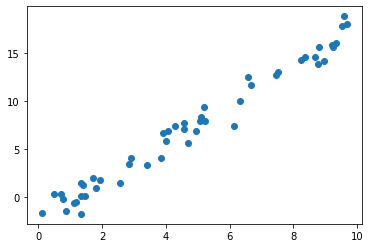

In [5]:
x = 10 * rng.rand(50)
y = 2*(x-1)+rng.randn(50)
plt.scatter(x, y)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

In [19]:
X = x[:, np.newaxis]

In [20]:
model.fit(X, y)

LinearRegression()

In [21]:
model.coef_

array([2.00667083])

In [22]:
model.intercept_

-2.274250707677319

In [23]:
xfit = np.linspace(-1, 11)

In [24]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

In [25]:
Xfit = xfit[:, np.newaxis]

In [26]:
yfit = model.predict(Xfit)

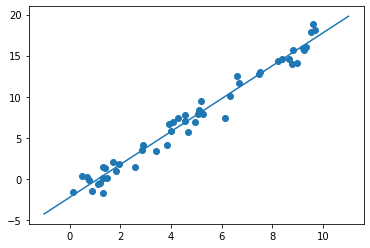

In [29]:
plt.scatter(x, y);plt.plot(xfit, yfit)

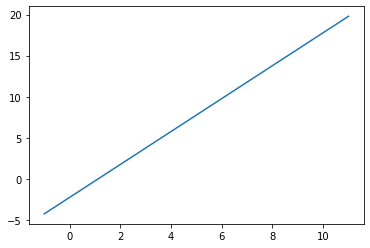

In [31]:
def make_data(N, err=1.0, rseed=1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1/((X.ravel() + 0.1))
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

In [33]:
y

array([ 7.24998644,  7.70041705, -0.12288892,  3.83970623,  1.50418461,
        1.31600899,  1.88404109,  5.0456151 ,  5.42819209,  6.59281674,
        5.70193919,  8.23148858,  1.8305394 ,  9.086429  ,  1.73425177,
        8.92229631,  6.16043712,  6.68597765,  0.8992155 ,  4.51082693,
        8.70162943,  8.39917725,  5.14639037, 10.37406543,  8.96816213,
        9.50648826,  0.9746409 , -0.20201375,  1.09605993,  8.50272859,
        0.67301646,  6.98083184,  9.856233  ,  8.32873282,  8.55755817,
        5.87386864,  7.49515774,  9.997533  ,  0.54626444,  8.1929663 ])

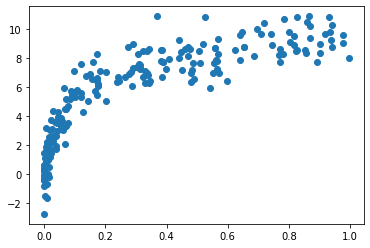

In [34]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

In [35]:
X2.ravel()

array([1.73907352e-01, 5.18867376e-01, 1.30815988e-08, 9.14049845e-02,
       2.15372915e-02, 8.52641608e-03, 3.46928663e-02, 1.19412216e-01,
       1.57424429e-01, 2.90323473e-01, 1.75724041e-01, 4.69525764e-01,
       4.18007224e-02, 7.71090232e-01, 7.50080261e-04, 4.49526682e-01,
       1.74143298e-01, 3.12134324e-01, 1.97084925e-02, 3.92442000e-02,
       6.41191864e-01, 9.37530479e-01, 9.82347155e-02, 4.79310604e-01,
       7.68057946e-01, 8.00321082e-01, 7.23251789e-03, 1.52527609e-03,
       2.88423714e-02, 7.71134256e-01, 9.67209972e-03, 1.77331632e-01,
       9.17552352e-01, 2.84265221e-01, 4.78693941e-01, 9.95501134e-02,
       4.71283524e-01, 6.96600012e-01, 3.34461088e-04, 5.62716493e-01,
       9.77846253e-01, 5.59751846e-01, 7.86488327e-02, 6.22961858e-01,
       1.06556084e-02, 2.00608611e-01, 8.25545788e-01, 8.62092681e-02,
       8.28146455e-02, 1.69074296e-02, 3.75079057e-04, 4.60817681e-01,
       4.47864595e-02, 7.05150283e-02, 2.41644171e-01, 2.84756122e-03,
      

In [45]:
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

/Users/abhinavkumar/PycharmProjects/RND/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Feature Engineering

### Categorical Features

In [47]:
data = [
               {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
               {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
               {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
               {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [62]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [63]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text Features

In [64]:
sample = ['problem of evil',
                     'evil queen',
                     'horizon problem']

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)

In [69]:
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [70]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


In [75]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
model = make_pipeline(SimpleImputer(strategy='mean'), PolynomialFeatures(degree=2), LinearRegression())

In [79]:
from numpy import nan 

X=np.array([[nan,0, 3],
            [3, 7, 9], 
            [3, 5, 2], 
            [4, nan,6], 
            [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [80]:
model.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [82]:
model.predict(X)

array([14., 16., -1.,  8., -5.])

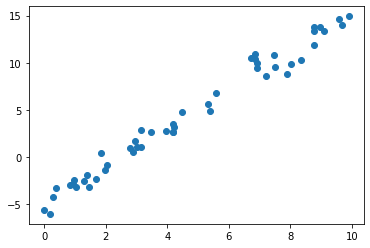

In [85]:
rng = np.random.RandomState(1) 
x = 10 * rng.rand(50)
y=2*x-5+rng.randn(50) 
plt.scatter(x, y);

In [86]:
from sklearn.linear_model import LinearRegression

In [88]:
model = LinearRegression(fit_intercept=True)

In [93]:
model.fit(x[:, np.newaxis], y)

LinearRegression()

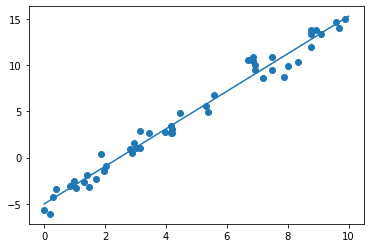

In [96]:
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)